Case Summary<a href="#Case-Summary" class="anchor-link">¶</a>
-------------------------------------------------------------

East-West Airlines is trying to learn more about its customers. Key
issues are their flying patterns, earning and use of frequent flyer
rewards, and use of the airline credit card. The task is to identify
customer segments via clustering. The file EastWestAirlines.xls contains
information on 4000 passengers who belong to an airline’s frequent flier
program. For each passenger the data include information on their
mileage history and on different ways they accrued or spent miles in the
last year. **The goal is to try to identify clusters of passengers that
have similar charactersitics for the purpose of targeting different
segments for different types of mileage offers.**

Please prepare a notebook including answers to each of the following
questions:

1.  Apply hierarchical clustering with Euclidean distance and complete
    linkage. How many clusters appear to be appropriate? (***25
    points***)

2.  Compare the cluster centroids to characterize the different clusters
    and try to give each cluster a label. (***20 points***)

3.  To check the stability of the clusters, remove a random 5% of the
    data (by taking a random sample of 95% of the records, namely 200
    records), and repeat the analysis. Does the same picture emerge? Use
    425 as the seed. (***10 points***)

4.  Use k-means algorithm with the number of clusters you found in part
    (a). Does the same picture emerge? (***25 points***)

5.  Which clusters would you target for offers, and what type of offers
    would you target to customers in that cluster? (***20 points***)

Below we provided you with a list of libraries that might be useful for
your case study. This list is only a sample of what you might need; you
are free to use any additional library serving your purpose.

**The homework is due Sunday, October 23 midnight.**

Data Description<a href="#Data-Description" class="anchor-link">¶</a>
---------------------------------------------------------------------

-   **Field Name**=ID\#; **Data Type**=NUMBER; **Description**=Unique ID

-   **Field Name**=Balance; **Data Type**=NUMBER; **Description**=Number
    of miles eligible for award travel

-   **Field Name**=Qual\_miles; **Data Type**=NUMBER;
    **Description**=Number of miles counted as qualifying for Topflight
    status

-   **Field Name**=cc1\_miles; **Data Type**=CHAR;
    **Description**=Number of miles earned with freq. flyer credit card
    in the past 12 months:

-   **Field Name**=cc2\_miles; **Data Type**=CHAR;
    **Description**=Number of miles earned with Rewards credit card in
    the past 12 months:

-   **Field Name**=cc3\_miles; **Data Type**=CHAR;
    **Description**=Number of miles earned with Small Business credit
    card in the past 12 months:

-   For cc1\_miles,cc2\_miles and cc3\_miles bins mean following ranges:

          - 1 = under 5,000
          - 2 = 5,000 - 10,000
          - 3 = 10,001 - 25,000
          - 4 = 25,001 - 50,000
          - 5 = over 50,000

-   **Field Name**=Bonus\_miles; **Data Type**=NUMBER;
    **Description**=Number of miles earned from non-flight bonus
    transactions in the past 12 months

-   **Field Name**=Bonus\_trans; **Data Type**=NUMBER;
    **Description**=Number of non-flight bonus transactions in the past
    12 months

-   **Field Name**=Flight\_miles\_12mo; **Data Type**=NUMBER;
    **Description**=Number of flight miles in the past 12 months

-   **Field Name**=Flight\_trans\_12; **Data Type**=NUMBER;
    **Description**=Number of flight transactions in the past 12 months

-   **Field Name**=Days\_since\_enroll; **Data Type**=NUMBER;
    **Description**=Number of days since Enroll\_date

-   **Field Name**=Award?; **Data Type**=NUMBER; **Description**=Dummy
    variable for Last\_award (1=not null, 0=null)

# Sample Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Get Data

In [186]:
data=pd.read_excel('EastWestAirlines.xls', sheet_name='data')

In [6]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Question 1

We have used scipy's own linkage module to create a complete linkage by Euclidean distance.

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage
zipped = list(zip(data.Balance, data.Qual_miles, data.cc1_miles, data.cc2_miles, data.cc3_miles, data.Bonus_miles,
                 data.Bonus_trans, data.Flight_miles_12mo, data.Flight_trans_12, data.Days_since_enroll, data.Award))
linkage_data = linkage(zipped, method='complete', metric='euclidean')

We have then graphed the dendrogram for all of the data. However, this dendrogram was confusing, non-readable and contained too many clusters: preventing it from being handy at all.

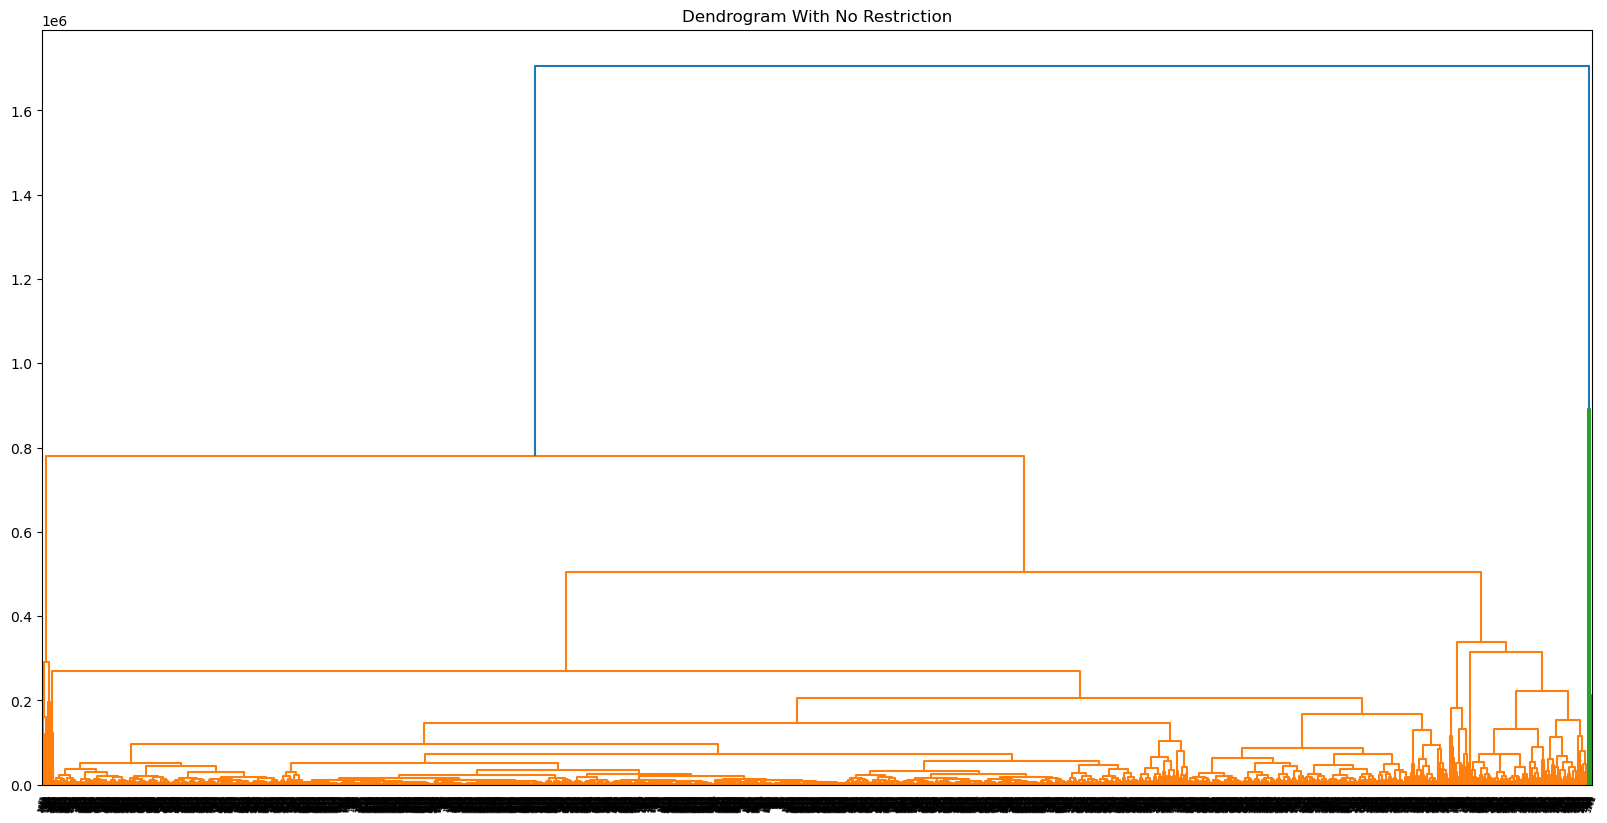

In [105]:
plt.figure(figsize=(20,10)).set_dpi(100)
dendrogram(linkage_data)
plt.xticks(rotation=70)
plt.title("Dendrogram With No Restriction")
plt.show()

So we decided to truncate the dendrogram to contain at maximum 5 levels. After that, we have determined that around y = 0.4, cluster size/cluster count ratio was appropriate. **So we have drawn a line that passes through y = 0.4 which intersected the dendrogram at 6 points which represented 5 different clusters and 1 singleton.** 

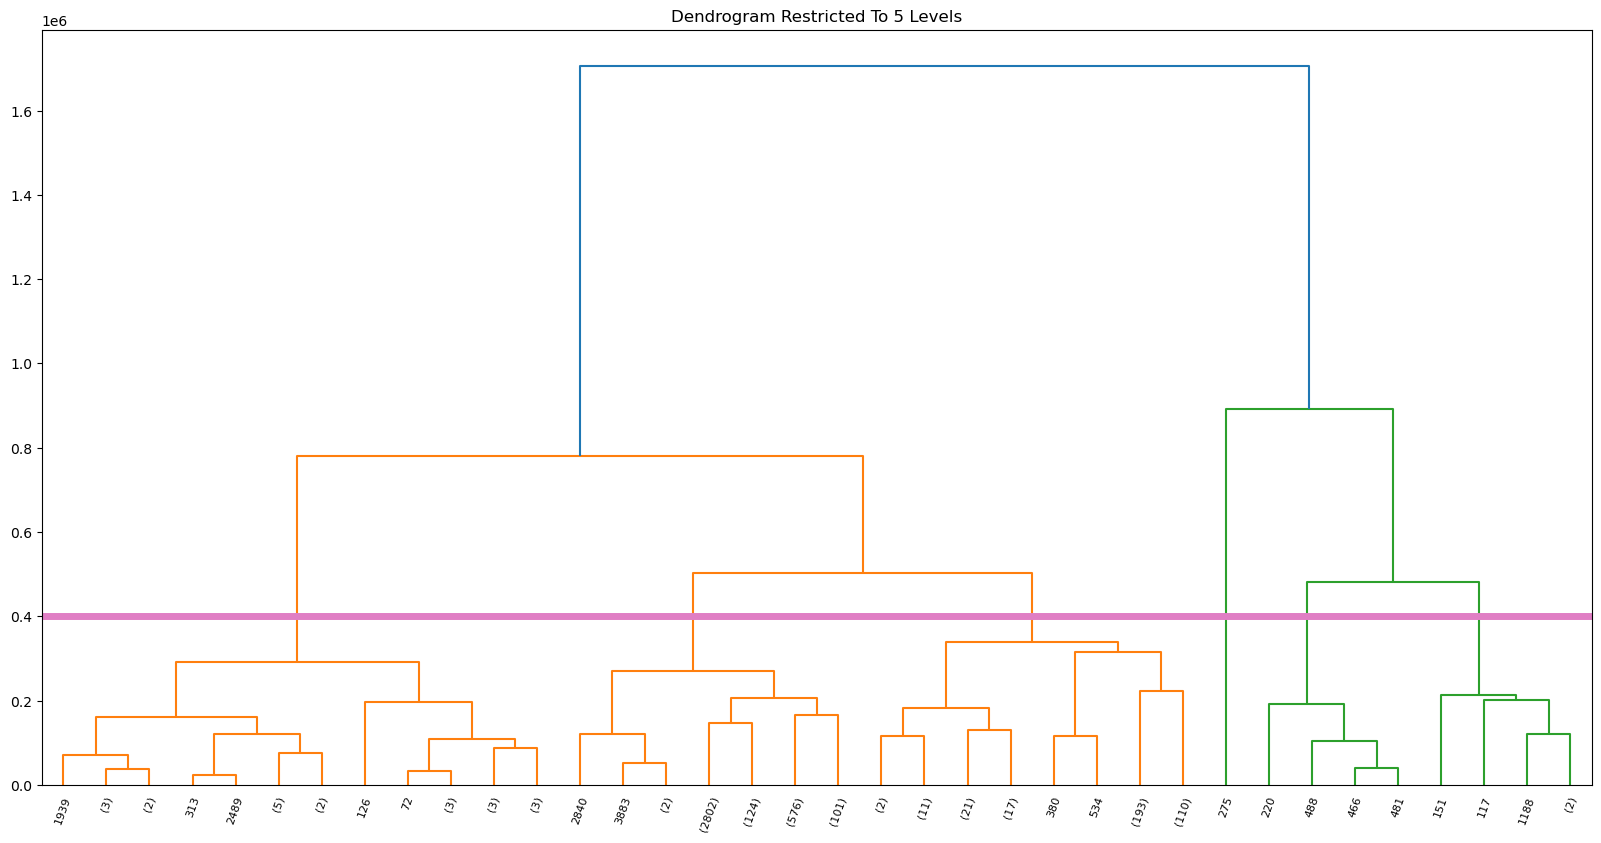

In [106]:
plt.figure(figsize=(20, 10)).set_dpi(100)
dendrogram(linkage_data,  p = 5, truncate_mode = 'level')
plt.axhline(y=4*pow(10, 5), color = "#e07ec4", linewidth = 5)
plt.xticks(rotation=70)
plt.title("Dendrogram Restricted To 5 Levels")
plt.show()

# Question 2

In [203]:
%%capture
struct = data.drop(columns = "ID")[:6]
kmeans = KMeans(n_clusters=6).fit(zipped)
centroids = kmeans.cluster_centers_
for i in range(len(struct)):
    struct["Balance"][i] = int(centroids[i][0])
    struct["Qual_miles"][i] = int(centroids[i][1])
    struct["cc1_miles"][i] = centroids[i][2]
    struct["cc2_miles"][i] = centroids[i][3]
    struct["cc3_miles"][i] = centroids[i][4]
    struct["Bonus_miles"][i] = int(centroids[i][5])
    struct["Bonus_trans"][i] = int(centroids[i][6])
    struct["Flight_miles_12mo"][i] = int(centroids[i][7])
    struct["Flight_trans_12"][i] = centroids[i][8]
    struct["Days_since_enroll"][i] = int(centroids[i][9])
    struct["Award"][i] = centroids[i][10]

In [204]:
struct

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,177183,253,3.071429,1.008403,1.029412,34710,17,901,2.445378,4975,0.476891
1,23214,97,1.468544,1.018038,1.003520,7346,8,236,0.741751,3696,0.300044
2,720621,247,3.478261,1.000000,1.130435,60298,21,1533,5.521739,6259,0.826087
3,82985,153,2.685973,1.009050,1.021719,25260,14,578,1.723982,4392,0.420814
4,363319,449,3.188034,1.025641,1.000000,49964,20,1589,4.735043,5668,0.717949
5,1288915,1528,3.000000,1.000000,1.000000,39098,24,2754,11.400000,7821,0.800000


# Question 3

# Question 4

# Question 5